# Questão 1

In [ ]:
data("airquality")

# Show dataset
print(airquality)

In [ ]:
# Show summary
summary(airquality)

In [ ]:
# str dataset
str(airquality)

In [ ]:
# mounths to text
airquality$Month <- factor(airquality$Month,
                           levels = 5:9,  # Valores originais de Month (5 = Maio, ..., 9 = Setembro)
                           labels = c("Maio", "Junho", "Julho", "Agosto", "Setembro"))

In [ ]:
airquality

In [ ]:
# Filtrar os dados para o mês de agosto (Month == 8)
agosto_data <- subset(airquality, Month == "Agosto")

# Encontrar o índice do maior valor de Ozone em agosto
max_ozone_day <- agosto_data[which.max(agosto_data$Ozone), "Day"]

# Mostrar o dia com o maior valor de Ozone
max_ozone_day


In [ ]:
# Filtrar os dados para o mês de agosto (Month == "Agosto") e Ozone > 70
agosto_ozone_maior_70 <- subset(airquality, Month == "Agosto" & Ozone > 70)

# Visualizar o subconjunto
agosto_ozone_maior_70

In [ ]:
# Estatísticas descritivas para a variável Ozone, agrupada por mês
estatisticas_ozone <- aggregate(Ozone ~ Month, data = airquality, FUN = summary)

# Mostrar as estatísticas descritivas
print(estatisticas_ozone)

In [ ]:
# Boxplot para Ozone, agrupado por Month
boxplot(Ozone ~ Month, data = airquality,
        main = "Boxplot de Ozone por Mês",
        xlab = "Mês",
        ylab = "Valor de Ozone",
        col = "lightblue")

# Questão 2

In [ ]:
# Dados da amostra
amostra <- c(403.43, 382.84, 401.85, 396.40, 389.87, 397.46, 402.12, 
             406.28, 404.48, 411.89, 402.09, 407.59, 391.65, 389.81, 
             393.21, 409.04, 422.56, 401.36, 420.26, 423.46)

# Estatísticas descritivas
media_amostra <- mean(amostra)
desvio_padrao <- sd(amostra)
n <- length(amostra)

cat("Média da amostra:", media_amostra, "\n")
cat("Desvio padrão da amostra:", desvio_padrao, "\n")
cat("Tamanho da amostra:", n, "\n")

In [ ]:
# a) Realizar o teste t para uma amostra com média hipotética de 400 mg
teste_t <- t.test(amostra, mu = 400)

# Exibir o resultado do teste t
print(teste_t)

In [ ]:
# b) Extrair o intervalo de confiança de 95%
intervalo_conf <- teste_t$conf.int
cat("Intervalo de confiança de 95%:", intervalo_conf, "\n")

# Questão 3

In [ ]:
# if (!require("asbio")) install.packages("asbio")

# se a instalacao do pacote asbio falhar
install.packages("remotes")
remotes::install_github("mjskay/asbio")

In [ ]:
# Carregar o pacote necessário
library("asbio", character.only = TRUE)

# Carregar o dataset "magnets"
data("magnets")

# Visualizar as primeiras linhas do dataset
head(magnets)

In [ ]:
# Criar uma nova variável que representa a diferença entre os scores antes e após o tratamento
magnets$dif_score <- magnets$Score_1 - magnets$Score_2

# Verificar a estrutura dos dados
print(magnets)

In [ ]:
# Separar os dados por grupo (magnetos e placebo)
dif_magnetos <- subset(magnets, Active == "Magnet")$dif_score
dif_placebo <- subset(magnets, Active == "Placebo")$dif_score

In [ ]:
# Verificar a homogeneidade de variâncias (utilizando o teste de Levene)
if (!require("car")) install.packages("car") # Biblioteca Companion to Applied Regression

In [ ]:
library("car", character.only = TRUE)

# leveneTest pertence a biblioteca "car"
# O teste de Levene verifica se as variâncias dos dois grupos são homogêneas.
leveneTest(magnets$dif_score ~ magnets$group)

In [ ]:
# Realizar o teste t de amostras independentes (com variância igual ou desigual dependendo do resultado anterior)
teste_t <- t.test(dif_magnetos, dif_placebo, var.equal = TRUE, alternative = "greater")

# Exibir o resultado do teste t
print(teste_t)

# Questão 4

In [ ]:
# Depende da biblioteca "asbio"
# Carregar o dataset "webs"
data("webs")

# Visualizar as primeiras linhas do dataset para entender a estrutura
head(webs)

In [ ]:
# a) Gráfico de dispersão
plot(webs$temp.C, webs$length, 
     xlab = "Temperatura (°C)", 
     ylab = "Comprimento dos Fios da Teia",
     main = "Gráfico de Dispersão: Comprimento vs. Temperatura",
     pch = 19, col = "blue")

# Adicionando uma linha de tendência (regressão linear)
abline(lm(webs$length ~ webs$temp.C), col = "red", lwd = 2)

# O gráfico de dispersão mostra a relação entre a temperatura e o comprimento dos fios de teia. 
# A linha de tendência nos ajuda a ver se há uma correlação linear entre as duas variáveis.

In [ ]:
# b) Ajustar o modelo de regressão linear
modelo <- lm(length ~ temp.C, data = webs)

# modelo ajustado
head(modelo)

In [ ]:
# c) Extraindo as variáveis
x <- webs$temp.C
y <- webs$length

# Calculando os parâmetros
beta1 <- sum((x - mean(x)) * (y - mean(y))) / sum((x - mean(x))^2)
beta0 <- mean(y) - beta1 * mean(x)

# Exibindo os resultados
cat("Beta0 (intercepto):", beta0, "\n")
cat("Beta1 (coeficiente):", beta1, "\n")

In [ ]:
# d) Gráfico de resíduos vs. valores ajustados
plot(modelo$fitted.values, modelo$residuals,
     xlab = "Valores Ajustados",
     ylab = "Resíduos",
     main = "Resíduos vs. Valores Ajustados",
     pch = 19, col = "purple")
abline(h = 0, col = "red")

In [ ]:
# Teste de normalidade dos resíduos (Shapiro-Wilk)
shapiro.test(modelo$residuals)

In [ ]:
# Histograma dos resíduos
hist(modelo$residuals, main = "Histograma dos Resíduos", xlab = "Resíduos", col = "lightgreen")

In [ ]:
# Gráfico Q-Q para normalidade
qqnorm(modelo$residuals)
qqline(modelo$residuals, col = "red")

# Questão 5

In [ ]:
# Carregar os pacotes necessários
if (!require("car")) install.packages("car")
if (!require("emmeans")) install.packages("emmeans")

In [ ]:
library("car", character.only = TRUE)
library("emmeans", character.only = TRUE)

In [ ]:
# Criar o dataframe a partir dos dados fornecidos
profundidade <- c(93, 120, 65, 105, 115, 82, 99, 87, 100, 90, 78, 95, 93, 88, 110,
                  85, 45, 80, 28, 75, 70, 65, 55, 50, 40, 45, 55,
                  100, 75, 65, 40, 73, 65, 50, 30, 45, 50,
                  96, 58, 95, 90, 65, 80, 85, 95, 82)

local <- c(rep("Local_1", 15), rep("Local_2", 12), rep("Local_3", 10), rep("Local_4", 9))

# Montar o dataframe
df <- data.frame(profundidade, local)

# Visualizar o dataframe
head(df)

In [ ]:
# Ajustar o modelo de regressão linear
modelo_anova <- lm(profundidade ~ local, data = df)

head(modelo_anova)

In [ ]:
# Obter a tabela ANOVA usando a função Anova() do pacote 'car'
anova_result <- Anova(modelo_anova)
print(anova_result)

In [ ]:
# Realizar múltiplas comparações de pares de médias
comparacoes <- emmeans(modelo_anova, pairwise ~ local)
print(comparacoes)

In [ ]:
# Gráfico de resíduos vs. valores ajustados
plot(modelo_anova$fitted.values, modelo_anova$residuals,
     xlab = "Valores Ajustados", 
     ylab = "Resíduos",
     main = "Resíduos vs. Valores Ajustados",
     pch = 19, col = "blue")
abline(h = 0, col = "red")

In [ ]:
# Teste de normalidade dos resíduos (Shapiro-Wilk)
shapiro_test <- shapiro.test(modelo_anova$residuals)
print(shapiro_test)

In [ ]:
# Gráfico Q-Q para normalidade
qqnorm(modelo_anova$residuals)
qqline(modelo_anova$residuals, col = "red")

In [ ]:
# Teste de homogeneidade de variâncias (Levene)
levene_test <- leveneTest(profundidade ~ local, data = df)
print(levene_test)

# Questão 6

In [ ]:
# Instalar pacotes necessários
if (!require("MASS")) install.packages("MASS")
if (!require("leaps")) install.packages("leaps")
if (!require("car")) install.packages("car")

In [ ]:
# Carregar os pacotes
library("MASS", character.only = TRUE)
library("leaps", character.only = TRUE)
library("car", character.only = TRUE)

In [ ]:
# 6.1 Importar os dados
# o arquivo ozone.txt precisa estar na mesma pasta que este arquivo
ozone_data <- read.table("ozone.txt", header = TRUE)

In [ ]:
# Verificar a estrutura dos dados
str(ozone_data)

In [ ]:
# Resumo estatístico dos dados
summary(ozone_data)

In [ ]:
# Selecionar apenas as variáveis contínuas para a correlação
continuous_vars <- ozone_data[, c("maxO3", "T9", "T12", "T15", "Ne9", "Ne12", "Ne15", "Wx9", "Wx12", "Wx15", "maxO3y")]

# Obter a matriz de correlação
cor_matrix <- cor(continuous_vars, use = "complete.obs")
print(cor_matrix)

In [ ]:
# Gráfico de dispersão para as variáveis contínuas
pairs(continuous_vars, main = "Scatterplot Matrix - Variáveis Contínuas", col = "blue")

In [ ]:
# 6.2 Ajustar o modelo de regressão linear com todas as variáveis explicativas
modelo_ozone <- lm(maxO3 ~ T9 + T12 + T15 + Ne9 + Ne12 + Ne15 + Wx9 + Wx12 + Wx15 + maxO3y, data = ozone_data)

# Resumo do modelo
summary(modelo_ozone)

In [ ]:
# 6.3 Método Stepwise usando stepAIC
stepwise_model <- stepAIC(modelo_ozone, direction = "both")
summary(stepwise_model)

In [ ]:
# Ajustar todas as regressões possíveis
library("leaps", character.only = TRUE)
reg_model <- regsubsets(maxO3 ~ T9 + T12 + T15 + Ne9 + Ne12 + Ne15 + Wx9 + Wx12 + Wx15 + maxO3y, data = ozone_data, nvmax = 10)

# Resumo do modelo
reg_summary <- summary(reg_model)

# Visualizar os melhores modelos
print(reg_summary$which)

In [ ]:
# Ajustar o modelo final com as variáveis selecionadas
final_model <- stepwise_model

# Gráfico de resíduos vs. valores ajustados
plot(final_model$fitted.values, final_model$residuals,
     xlab = "Valores Ajustados", ylab = "Resíduos",
     main = "Resíduos vs. Valores Ajustados",
     pch = 19, col = "blue")
abline(h = 0, col = "red")

In [ ]:
# Gráfico Q-Q para normalidade dos resíduos
qqnorm(final_model$residuals)
qqline(final_model$residuals, col = "red")

In [ ]:
# Teste de normalidade (Shapiro-Wilk)
shapiro_test <- shapiro.test(final_model$residuals)
print(shapiro_test)

In [ ]:
# Teste de homocedasticidade (Teste de Breusch-Pagan)
library("lmtest", character.only = TRUE)
bptest(final_model)

# Questão 7

In [ ]:
# Criar o dataframe com os dados fornecidos
dados_trigo <- data.frame(
  variedades = rep(c("Trocadero", "Kumberri", "Bokaro"), each = 5),
  bloco = rep(c("Bloco I", "Bloco II", "Bloco III", "Bloco IV", "Bloco V"), times = 3),
  peso = c(249, 313, 388, 487, 350,   # Trocadero
           304, 354, 421, 459, 430,   # Kumberri
           234, 290, 335, 410, 341)   # Bokaro
)

# Visualizar o dataframe
print(dados_trigo)

In [ ]:
# Ajustar o modelo de ANOVA com variedades e blocos
modelo_anova <- aov(peso ~ variedades + bloco, data = dados_trigo)

# Resumo da ANOVA
summary(modelo_anova)

In [ ]:
# Obter os resíduos do modelo
residuos <- residuals(modelo_anova)

# Gráfico de resíduos vs. valores ajustados
plot(modelo_anova$fitted.values, residuos,
     xlab = "Valores Ajustados", ylab = "Resíduos",
     main = "Resíduos vs. Valores Ajustados",
     pch = 19, col = "blue")
abline(h = 0, col = "red")

In [ ]:
# Gráfico Q-Q para verificar normalidade
qqnorm(residuos)
qqline(residuos, col = "red")

In [ ]:
# Teste de normalidade (Shapiro-Wilk)
shapiro_test <- shapiro.test(residuos)
print(shapiro_test)

In [ ]:
# Instalar e carregar o pacote lmtest
install.packages("lmtest")
library("lmtest", character.only = TRUE)

In [ ]:
# Teste de homocedasticidade
bptest(modelo_anova)

In [1]:
dados <- data.frame( 
Bloco = rep(c("Bloco I", "Bloco II", "Bloco III", "Bloco IV", "Bloco V"), 
each = 3), 
Variedade = rep(c("Trocadero", "Kumberri", "Bokaro"), times = 5), 
Producao = c(249, 304, 234, 313, 354, 290, 388, 421, 335, 487, 459, 410, 350, 430, 341) 
)

print(dados)

       Bloco Variedade Producao
1    Bloco I Trocadero      249
2    Bloco I  Kumberri      304
3    Bloco I    Bokaro      234
4   Bloco II Trocadero      313
5   Bloco II  Kumberri      354
6   Bloco II    Bokaro      290
7  Bloco III Trocadero      388
8  Bloco III  Kumberri      421
9  Bloco III    Bokaro      335
10  Bloco IV Trocadero      487
11  Bloco IV  Kumberri      459
12  Bloco IV    Bokaro      410
13   Bloco V Trocadero      350
14   Bloco V  Kumberri      430
15   Bloco V    Bokaro      341


In [2]:
modelo <- aov(Producao ~ Variedade + Bloco, data = dados) 

# Resumo do modelo 
summary(modelo)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Variedade    2  12817    6408   14.22  0.00232 ** 
Bloco        4  60895   15224   33.78 4.66e-05 ***
Residuals    8   3605     451                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [3]:
# Teste de normalidade da amostra
shapiro.test(residuals(modelo))


	Shapiro-Wilk normality test

data:  residuals(modelo)
W = 0.96284, p-value = 0.7416


In [4]:
# Homogeneidade de variâncias 
library("car", character.only = TRUE) 
leveneTest(Producao ~ Variedade, data = dados)

ERROR: Error in library("car", character.only = TRUE): não há nenhum pacote chamado ‘car’


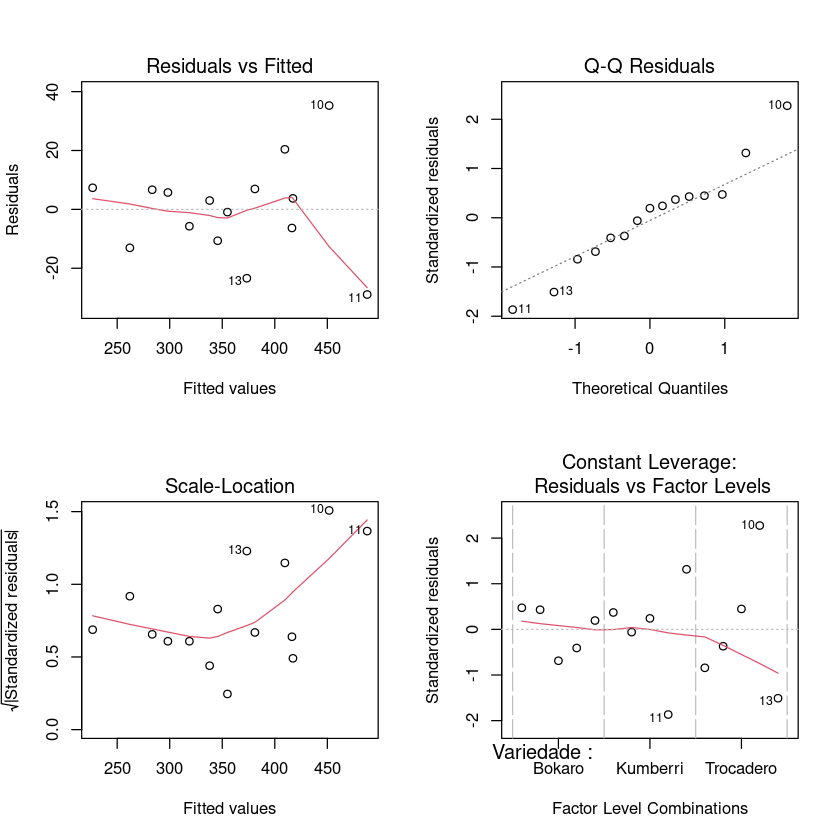

In [9]:
# plot
par(mfrow = c(2, 2)) 
plot(modelo)